In [10]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [15]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding the cities
cities = []
basic_url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}'
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # Add to list if unique
    if city not in cities:
        cities.append(city)
# Get number of cities to ensure enough
len(cities)

645

In [18]:
# Create list to hold weather data and counter variables
city_data = []

print('Beginning Data Retrieval     ')
print('-----------------------------')

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# 2. Loop through cities list
for i, city in enumerate(cities):

    # 3. Group cities in sets of 50 to match allowance of API
#   - 2 counters, 1 to log city count, other for the sets
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)

    # 4. Build endpoint URL for each city
    # Create endpoint url with each city
    city_url = basic_url + '&q=' + city.replace(' ','+')

    # 5. Log URL, record and set numbers
    # Log URL, record and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # 6. Make API request for each city
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # 7. Parse JSON for:
        #   -City, country, date, latitude, longitude, max temp, humidity, cloudiness, wind speed
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # 8. Add data to list in dictionary format then convert to dataframe
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ous
Processing Record 4 of Set 1 | birao
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | olafsvik
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | kurchum
Processing Record 12 of Set 1 | tatawin
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | riyadh
Processing Record 15 of Set 1 | tubruq
City not found. Skipping...
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | leshukonskoye
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | sao gabriel da cachoeira
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | cidreira
Processing Record 24 of S

In [20]:
len(city_data)

592

In [21]:
# Convert array of dictionaries to df
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,35.24,43,40,11.50,US,2022-12-09 20:42:23
1,Cape Town,-33.9258,18.4232,68.41,84,20,8.05,ZA,2022-12-09 20:42:24
2,Ous,60.9058,61.5186,7.11,98,99,2.55,RU,2022-12-09 20:42:25
3,Birao,10.2849,22.7882,71.80,23,5,6.46,CF,2022-12-09 20:42:25
4,Ilulissat,69.2167,-51.1000,39.22,45,75,14.97,GL,2022-12-09 20:42:25


In [24]:
# Organize columns
columns_organized = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[columns_organized]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-12-09 20:42:23,42.0970,-79.2353,35.24,43,40,11.50
1,Cape Town,ZA,2022-12-09 20:42:24,-33.9258,18.4232,68.41,84,20,8.05
2,Ous,RU,2022-12-09 20:42:25,60.9058,61.5186,7.11,98,99,2.55
3,Birao,CF,2022-12-09 20:42:25,10.2849,22.7882,71.80,23,5,6.46
4,Ilulissat,GL,2022-12-09 20:42:25,69.2167,-51.1000,39.22,45,75,14.97
...,...,...,...,...,...,...,...,...,...
587,Salalah,OM,2022-12-09 20:54:48,17.0151,54.0924,73.72,52,2,0.54
588,Amapa,BR,2022-12-09 20:59:15,1.0000,-52.0000,83.16,54,80,3.42
589,Ponta Delgada,PT,2022-12-09 20:59:16,37.7333,-25.6667,63.50,88,40,23.02
590,Libreville,GA,2022-12-09 20:59:16,0.3925,9.4537,79.90,83,61,7.47


In [25]:
# Export data to csv
export_file = 'weather_data/cities.csv'
city_data_df.to_csv(export_file, index_label='City_ID')

In [26]:
# Extract fields from dataframe for plotting
latitude = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

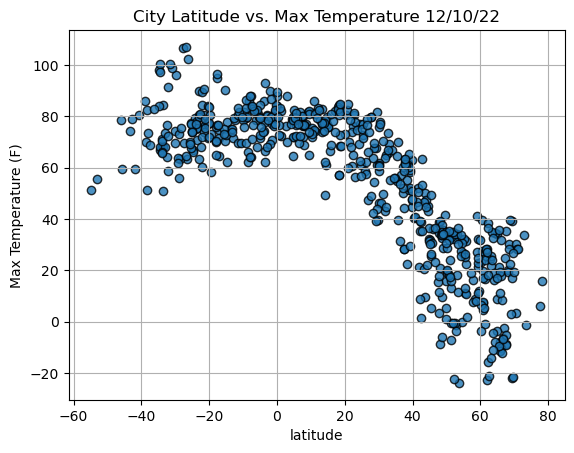

In [28]:
# Import time module
import time

# Build scatter plot for lat vs. max temp
plt.scatter(latitude,
            max_temps,
            ec='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Add in other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()